In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import *
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing.image import *
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow # for image display
from matplotlib import pyplot as plt
import sklearn as sk
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Prepare data

In [4]:
CSV_PATH = "/content/drive/MyDrive/Tesis/Datasets/Productos_augmented/annotations_data_augmented.csv"
IMAGES_PATH = "/content/drive/MyDrive/Tesis/Datasets/Productos_augmented/images/"

In [5]:

def pre_process_data(path,images_path =""):
  #colnames=['filename','xmin', 'ymin', 'xmax', 'ymax',\
  #          'class','width','height']
  
  annotate_data=pd.read_csv(path,header=0)
  #annotate_data.columns = colnames
  annotate_data['filename'] = images_path+annotate_data['filename'].astype(str)
  #annotate_data = annotate_data[['filename', 'class','width', 'height', 'xmin','ymin','xmax','ymax']]
  annotate_data = annotate_data[annotate_data['class'] != 1]
  return annotate_data

images_df = pre_process_data(CSV_PATH,IMAGES_PATH)

In [6]:
images_df.head()

,filename,class,width,height,xmin,ymin,xmax,ymax
150,/content/drive/MyDrive/Tesis/Datasets/Producto...,8,3024,4032,18,6,275,520
151,/content/drive/MyDrive/Tesis/Datasets/Producto...,7,3024,4032,320,12,520,526
152,/content/drive/MyDrive/Tesis/Datasets/Producto...,6,3024,4032,1282,9,1506,502
153,/content/drive/MyDrive/Tesis/Datasets/Producto...,6,3024,4032,1034,9,1261,505
154,/content/drive/MyDrive/Tesis/Datasets/Producto...,7,3024,4032,1153,711,1458,1936


In [7]:
images_df.dtypes

filename    object
class        int64
width        int64
height       int64
xmin         int64
ymin         int64
xmax         int64
ymax         int64
dtype: object

In [8]:
num_classes = len(list(images_df['class'].unique()))
num_classes

12

In [9]:
classes_ids = list(images_df['class'].unique())
classes_ids.sort()
classes_ids

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [10]:
ids = {'object':0,'fluo_cardent':1,'zucaritas':2,'chocokrispis':3,'fruit_loops':4,'colombiana':5,'manzana':6,'pepsi':7,'corn_flakes':8,'papas_limon':9,'colgate':10,'papas_pollo':11,'papas_natural':12}
for k in ids.keys():
    ids[k] += 1
category_id_to_name = {ids[k]:k for k in ids.keys()}

classes_names = [category_id_to_name[i] for i in classes_ids]
classes_names

['fluo_cardent',
 'zucaritas',
 'chocokrispis',
 'fruit_loops',
 'colombiana',
 'manzana',
 'pepsi',
 'corn_flakes',
 'papas_limon',
 'colgate',
 'papas_pollo',
 'papas_natural']

In [11]:
class_count = {classes_names[i]:0 for i in range(len(classes_names))}
total_crops=0
for index,row in images_df.iterrows():
  class_count[category_id_to_name[row['class']]] += 1
  total_crops += 1
class_count


{'chocokrispis': 954,
 'colgate': 535,
 'colombiana': 501,
 'corn_flakes': 241,
 'fluo_cardent': 601,
 'fruit_loops': 872,
 'manzana': 414,
 'papas_limon': 611,
 'papas_natural': 482,
 'papas_pollo': 502,
 'pepsi': 271,
 'zucaritas': 811}

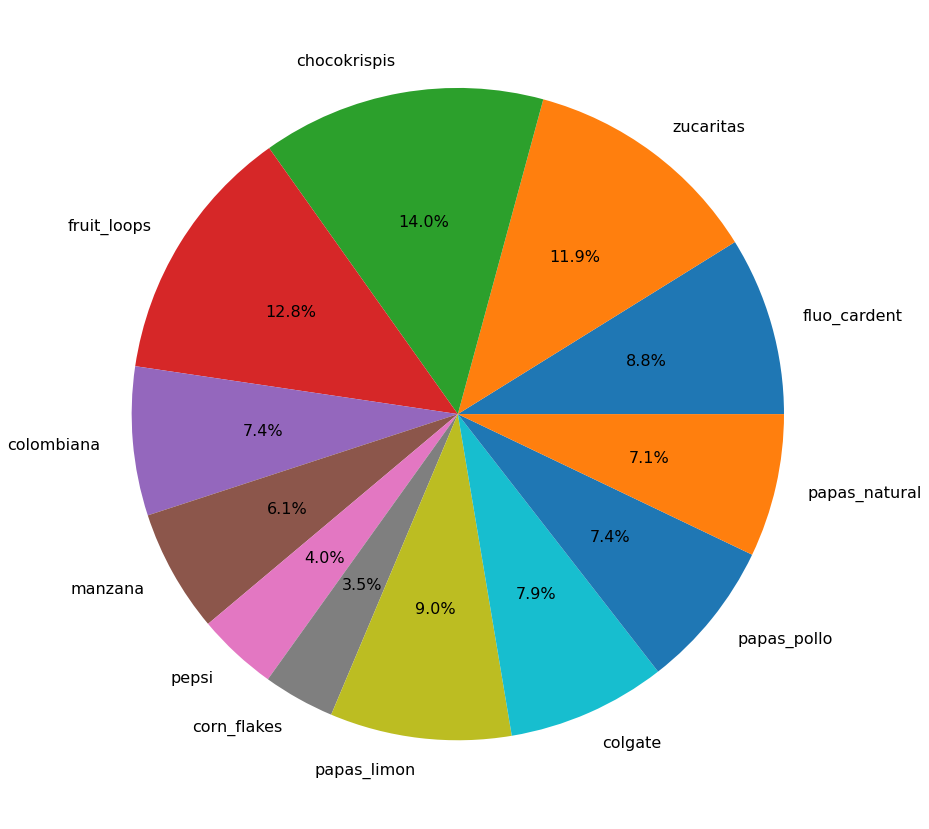

In [ ]:
#print(sum([class_count[k]/total_crops for k in class_count.keys()]))
plt.figure(figsize=(15, 15))
plt.pie([class_count[k]/total_crops for k in class_count.keys()],labels=class_count.keys(),autopct='%1.1f%%',textprops={'fontsize': 16})
plt.show()

In [ ]:
#Create directory for each class
cwd = os.getcwd()
dir = os.path.join(cwd,"images")

if not os.path.exists(dir): os.mkdir(dir)
for name in classes_ids:
  dir = os.path.join(cwd,"images",str(name))
  if not os.path.exists(dir):
    os.mkdir(dir)


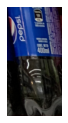

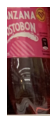

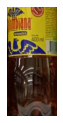

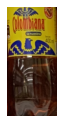

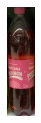

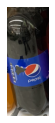

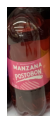

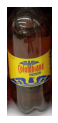

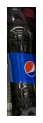

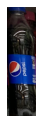

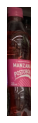

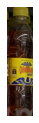

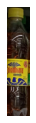

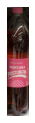

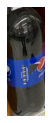

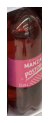

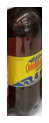

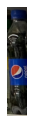

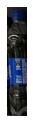

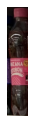

In [ ]:
crops_names = {name:0 for name in category_id_to_name}
dims = []
def make_partitions():
  N = 20
  for index,row in images_df.iterrows():
    xmin,ymin,xmax,ymax = row['xmin'],row['ymin'],row['xmax'],row['ymax']
    w,h = xmax-xmin,ymax-ymin
    img = cv2.imread(row['filename'])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img[ymin:ymin+h,xmin:xmin+w]
    #dir = os.path.join(cwd,"images",category_id_to_name[row['class']],category_id_to_name[row['class']]+str(crops_names[row['class']])+".jpg")
    dir = os.path.join(cwd,"images",str(row['class']),category_id_to_name[row['class']]+str(crops_names[row['class']])+".jpg")
    
    crops_names[row['class']] += 1
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(dir,img)
    dims.append(img.shape)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if N > 0:
      plt.figure(figsize=(2, 2))
      plt.axis('off')
      plt.imshow(img)
    
    N -= 1
#make_partitions()

In [ ]:
crops_names

{1: 0,
 2: 601,
 3: 811,
 4: 954,
 5: 872,
 6: 501,
 7: 414,
 8: 271,
 9: 241,
 10: 611,
 11: 535,
 12: 502,
 13: 482}

In [ ]:
!zip -r '/content/images.zip' '/content/images'

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  adding: content/images/6/colombiana352.jpg (deflated 1%)
  adding: content/images/6/colombiana73.jpg (deflated 0%)
  adding: content/images/6/colombiana288.jpg (deflated 2%)
  adding: content/images/6/colombiana105.jpg (deflated 5%)
  adding: content/images/6/colombiana358.jpg (deflated 0%)
  adding: content/images/6/colombiana223.jpg (deflated 3%)
  adding: content/images/6/colombiana139.jpg (deflated 0%)
  adding: content/images/6/colombiana392.jpg (deflated 1%)
  adding: content/images/6/colombiana207.jpg (deflated 3%)
  adding: content/images/6/colombiana263.jpg (deflated 1%)
  adding: content/images/6/colombiana399.jpg (deflated 1%)
  adding: content/images/6/colombiana254.jpg (deflated 1%)
  adding: content/images/6/colombiana354.jpg (deflated 1%)
  adding: content/images/6/colombiana238.jpg (deflated 1%)
  adding: content/images/6/colombiana185.jpg (deflated 0%)
  adding: content/images/6/colombiana428.jpg (def

In [14]:
#data_dir = os.path.join(cwd,"images")
train_dir = "/content/drive/MyDrive/Tesis/Datasets/Productos_augmented_partition_processed/train"
val_dir = "/content/drive/MyDrive/Tesis/Datasets/Productos_augmented_partition_processed/val"
test_dir = "/content/drive/MyDrive/Tesis/Datasets/Productos_augmented_partition_processed/test"


#Resnet 

In [ ]:
img_height,img_width = 224,224
batch_size = 32

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  label_mode = 'categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)#porque batch size?


Found 4072 files belonging to 12 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  label_mode = 'categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)#porque batch size?

Found 1355 files belonging to 12 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  label_mode = 'categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)#porque batch size?

Found 1368 files belonging to 12 classes.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
train_ds.class_names

['10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9']

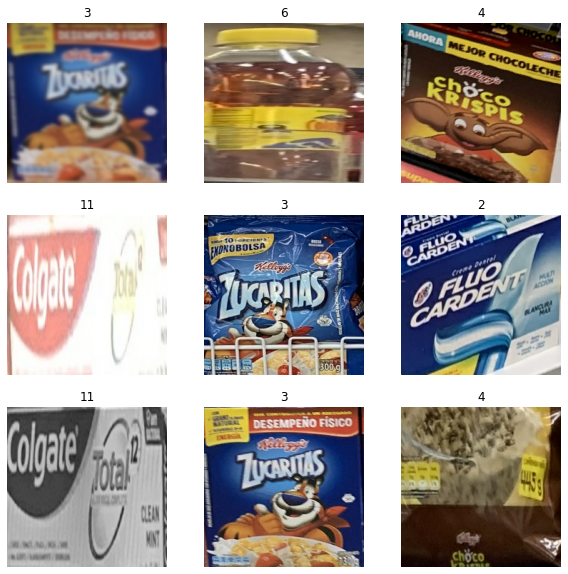

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")


In [ ]:
resnet = ResNet50(include_top=False,weights='imagenet',input_shape=(img_height,img_width,3))

resnet.trainable = False
inputs = tf.keras.Input(shape=(img_height,img_width,3))
x = resnet(inputs,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes,activation='softmax')(x)
model = tf.keras.Model(inputs,outputs)

# x = resnet.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024,activation='relu')(x)
# preds = Dense(num_classes,activation='softmax')(x)
# model = Model(inputs=resnet.input,outputs=preds)

#for layer in resnet.layers:
#  layer.trainable = False
#'sparse_categorical_crossentropy'

model.compile(optimizer='adam',loss=tf.keras.losses.CosineSimilarity(axis=-1),metrics=['accuracy'])
model.summary()


94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 12)                24588     
                                                                 
Total params: 23,612,300
Trainable params: 24,588
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
%%time
epochs = 10
history = model.fit(train_ds,epochs=epochs,validation_data=val_ds)

Epoch 1/10
128/128 [==============================] - 1180s 9s/step - loss: -0.8023 - accuracy: 0.7834 - val_loss: -0.9225 - val_accuracy: 0.9166
Epoch 2/10
128/128 [==============================] - 596s 5s/step - loss: -0.9524 - accuracy: 0.9501 - val_loss: -0.9491 - val_accuracy: 0.9476
Epoch 3/10
128/128 [==============================] - 600s 5s/step - loss: -0.9722 - accuracy: 0.9730 - val_loss: -0.9604 - val_accuracy: 0.9594
Epoch 4/10
128/128 [==============================] - 595s 5s/step - loss: -0.9827 - accuracy: 0.9853 - val_loss: -0.9643 - val_accuracy: 0.9624
Epoch 5/10
128/128 [==============================] - 593s 5s/step - loss: -0.9887 - accuracy: 0.9921 - val_loss: -0.9669 - val_accuracy: 0.9631
Epoch 6/10
128/128 [==============================] - 596s 5s/step - loss: -0.9911 - accuracy: 0.9936 - val_loss: -0.9670 - val_accuracy: 0.9638
Epoch 7/10
128/128 [==============================] - 598s 5s/step - loss: -0.9937 - accuracy: 0.9961 - val_loss: -0.9652 - val_a

In [ ]:
model.save('content/resnet_retail_augmented_cosine.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


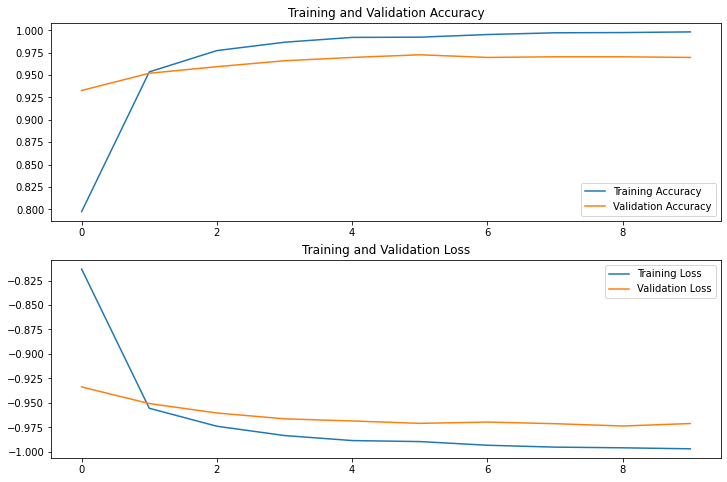

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Tesis/imageClassificationWeights/augmentedData/Resnet/resnet_retail_augmented.h5')

In [ ]:
test_loss,test_acc = model.evaluate(test_ds,verbose=2)
print("Test accuracy:",test_acc)

43/43 - 248s - loss: 0.1162 - accuracy: 0.9737 - 248s/epoch - 6s/step
Test accuracy: 0.9736841917037964


In [ ]:
#model = tf.keras.models.load_model("/content/drive/MyDrive/Tesis/imageClassificationWeights/Resnet/resnet_retail.h5")
# preds = list(model.predict(test_ds))
# preds = [list(preds[i]).index(max(preds[i])) for i in range(len(preds))]
# preds

cwd = os.getcwd()
dir = os.path.join(cwd,"images")
preds = []
labels = []
for sub_dir in os.listdir(test_dir):
  for img_name in os.listdir(os.path.join(test_dir,sub_dir)):
    img_dir = os.path.join(test_dir,sub_dir,img_name)
    #print(img_dir)
    img = tf.keras.utils.load_img(img_dir, target_size=(img_height, img_width))
    img = tf.keras.utils.img_to_array(img)
    img = tf.expand_dims(img, 0)
    #img = preprocess_input(img)
    pred = model.predict(img)
    labels.append(int(sub_dir)-2)
    pred = list(pred[0])
    preds.append(int(test_ds.class_names[np.argmax(pred)])-2)
    
    assert 0 <= preds[-1] <= num_classes-1
    

    
    #print(pred)
    #break
  #break

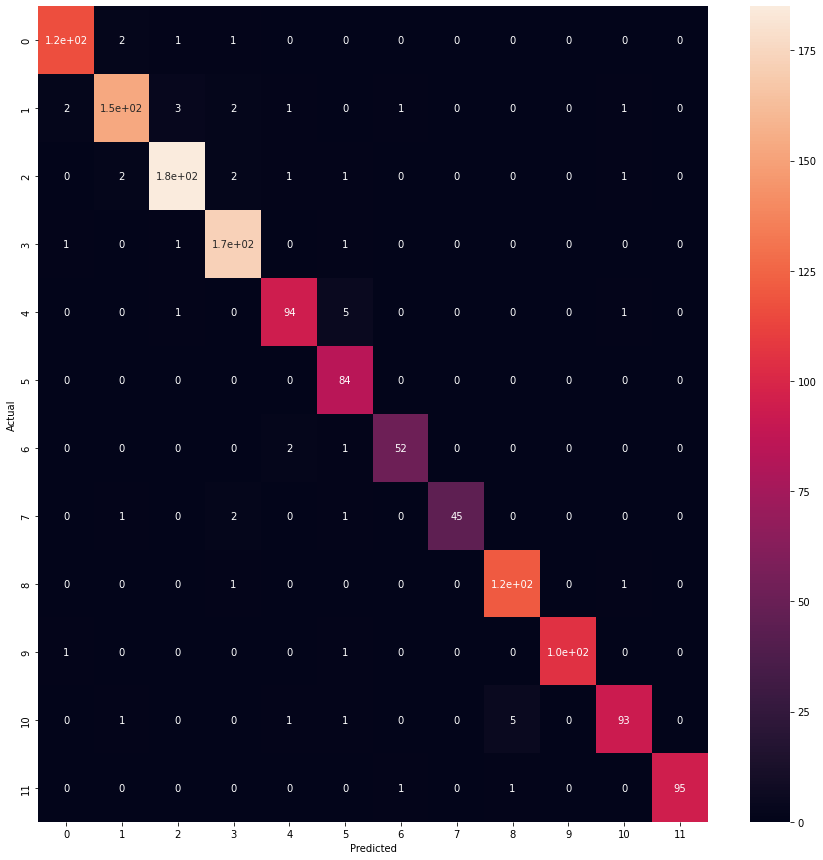

In [ ]:
from sklearn.metrics import confusion_matrix

assert len(labels) == len(preds)
conf_matrix = confusion_matrix(labels,preds)#tf.math.confusion_matrix(labels=labels, predictions=preds, num_classes=num_classes)
#conf_matrix
plt.figure(figsize=(15, 15))
conf_matrix = pd.crosstab(np.array(labels), np.array(preds), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

plt.show()

In [ ]:
#https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.5f}\n'.format(accuracy_score(labels, preds)))

print('Micro Precision: {:.5f}'.format(precision_score(labels, preds, average='micro')))
print('Micro Recall: {:.5f}'.format(recall_score(labels, preds, average='micro')))
print('Micro F1-score: {:.5f}\n'.format(f1_score(labels, preds, average='micro')))

print('Macro Precision: {:.5f}'.format(precision_score(labels, preds, average='macro')))
print('Macro Recall: {:.5f}'.format(recall_score(labels, preds, average='macro')))
print('Macro F1-score: {:.5f}\n'.format(f1_score(labels, preds, average='macro')))

print('Weighted Precision: {:.5f}'.format(precision_score(labels, preds, average='weighted')))
print('Weighted Recall: {:.5f}'.format(recall_score(labels, preds, average='weighted')))
print('Weighted F1-score: {:.5f}'.format(f1_score(labels, preds, average='weighted')))


Accuracy: 0.96199

Micro Precision: 0.96199
Micro Recall: 0.96199
Micro F1-score: 0.96199

Macro Precision: 0.96346
Macro Recall: 0.95931
Macro F1-score: 0.96083

Weighted Precision: 0.96287
Weighted Recall: 0.96199
Weighted F1-score: 0.96203


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(labels, preds, target_names=['Class {0}'.format(i+1) for i in range(num_classes)])
print(report)

              precision    recall  f1-score   support

     Class 1       0.97      0.97      0.97       121
     Class 2       0.96      0.94      0.95       163
     Class 3       0.97      0.96      0.97       192
     Class 4       0.96      0.98      0.97       175
     Class 5       0.95      0.93      0.94       101
     Class 6       0.88      1.00      0.94        84
     Class 7       0.96      0.95      0.95        55
     Class 8       1.00      0.92      0.96        49
     Class 9       0.95      0.98      0.97       123
    Class 10       1.00      0.98      0.99       107
    Class 11       0.96      0.92      0.94       101
    Class 12       1.00      0.98      0.99        97

    accuracy                           0.96      1368
   macro avg       0.96      0.96      0.96      1368
weighted avg       0.96      0.96      0.96      1368



# VGG 19

In [ ]:
img_height,img_width = 224,224
batch_size = 32

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  label_mode = 'categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)#porque batch size?


Found 4072 files belonging to 12 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  label_mode = 'categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)#porque batch size?

Found 1355 files belonging to 12 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  label_mode = 'categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)#porque batch size?

Found 1368 files belonging to 12 classes.


In [ ]:
train_ds.class_names

['10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9']

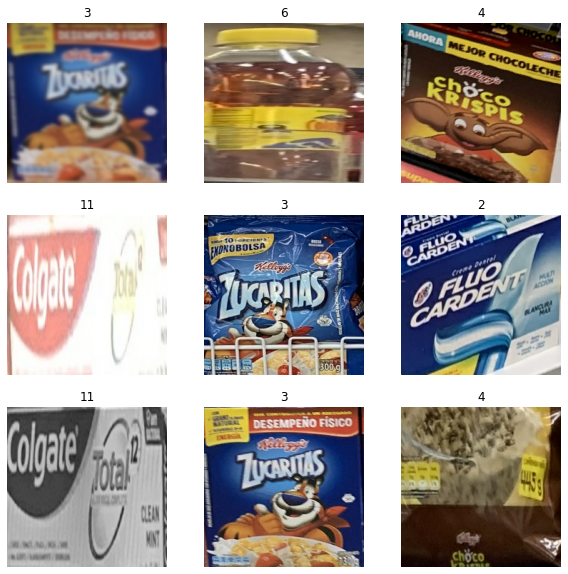

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
VGG19 = VGG19(include_top=False,weights='imagenet',input_shape=(img_height,img_width,3))

VGG19.trainable = False
inputs = tf.keras.Input(shape=(img_height,img_width,3))
x = VGG19(inputs,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes,activation='softmax')(x)
model = tf.keras.Model(inputs,outputs)

# x = resnet.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024,activation='relu')(x)
# preds = Dense(num_classes,activation='softmax')(x)
# model = Model(inputs=resnet.input,outputs=preds)

#for layer in resnet.layers:
#  layer.trainable = False

model.compile(optimizer='adam',loss=tf.keras.losses.CosineSimilarity(axis=-1),metrics=['accuracy'])
model.summary()


80150528/80134624 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 12)                6156      
                                                                 
Total params: 20,030,540
Trainable params: 6,156
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
%%time
epochs = 10
history = model.fit(train_ds,epochs=epochs,validation_data=val_ds)

Epoch 1/10
128/128 [==============================] - 2636s 21s/step - loss: -0.3922 - accuracy: 0.3649 - val_loss: -0.5600 - val_accuracy: 0.5358
Epoch 2/10
128/128 [==============================] - 2650s 21s/step - loss: -0.6411 - accuracy: 0.6208 - val_loss: -0.6909 - val_accuracy: 0.6723
Epoch 3/10
128/128 [==============================] - 2621s 21s/step - loss: -0.7742 - accuracy: 0.7606 - val_loss: -0.7720 - val_accuracy: 0.7601
Epoch 4/10
128/128 [==============================] - 2632s 21s/step - loss: -0.8118 - accuracy: 0.8023 - val_loss: -0.7915 - val_accuracy: 0.7779
Epoch 5/10
128/128 [==============================] - 2610s 20s/step - loss: -0.8296 - accuracy: 0.8251 - val_loss: -0.7994 - val_accuracy: 0.7852
Epoch 6/10
128/128 [==============================] - 2620s 21s/step - loss: -0.8381 - accuracy: 0.8352 - val_loss: -0.7966 - val_accuracy: 0.7845
Epoch 7/10
128/128 [==============================] - 2594s 20s/step - loss: -0.8458 - accuracy: 0.8450 - val_loss: -0

In [ ]:
model.save('content/VGG19_retail_augmented_cosine.h5')

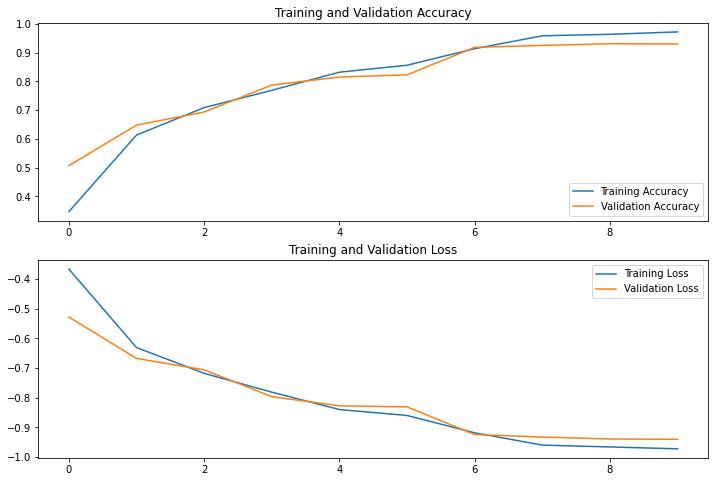

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Tesis/imageClassificationWeights/augmentedData/VGG19/VGG19_retail_augmented.h5')

In [ ]:
test_loss,test_acc = model.evaluate(test_ds,verbose=2)
print("Test accuracy:",test_acc)

43/43 - 768s - loss: 0.1920 - accuracy: 0.9364 - 768s/epoch - 18s/step
Test accuracy: 0.9364035129547119


In [ ]:
#model = tf.keras.models.load_model("/content/drive/MyDrive/Tesis/imageClassificationWeights/Resnet/resnet_retail.h5")
# preds = list(model.predict(test_ds))
# preds = [list(preds[i]).index(max(preds[i])) for i in range(len(preds))]
# preds

cwd = os.getcwd()
dir = os.path.join(cwd,"images")
preds = []
labels = []
for sub_dir in os.listdir(test_dir):
  for img_name in os.listdir(os.path.join(test_dir,sub_dir)):
    img_dir = os.path.join(test_dir,sub_dir,img_name)
    #print(img_dir)
    img = tf.keras.utils.load_img(img_dir, target_size=(img_height, img_width))
    img = tf.keras.utils.img_to_array(img)
    img = tf.expand_dims(img, 0)
    #img = preprocess_input(img)
    pred = model.predict(img)
    labels.append(int(sub_dir)-2)
    pred = list(pred[0])
    preds.append(int(test_ds.class_names[np.argmax(pred)])-2)
    
    assert 0 <= preds[-1] <= num_classes-1
    

    
    #print(pred)
    #break
  #break

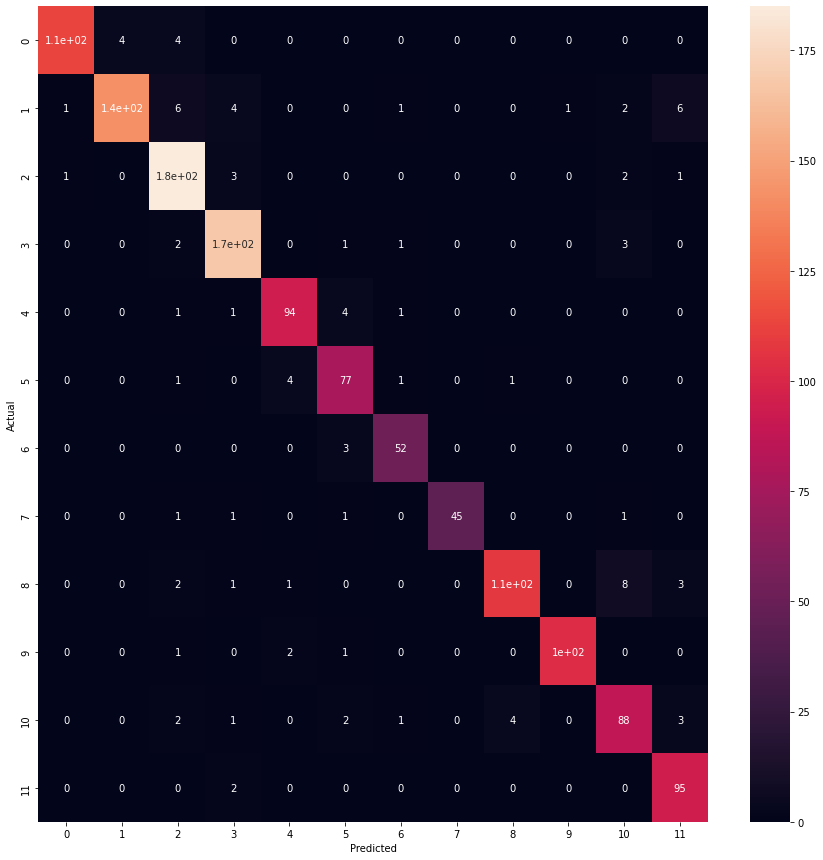

In [ ]:
from sklearn.metrics import confusion_matrix

assert len(labels) == len(preds)
conf_matrix = confusion_matrix(labels,preds)#tf.math.confusion_matrix(labels=labels, predictions=preds, num_classes=num_classes)
#conf_matrix
plt.figure(figsize=(15, 15))
conf_matrix = pd.crosstab(np.array(labels), np.array(preds), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

plt.show()

In [ ]:
#https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.5f}\n'.format(accuracy_score(labels, preds)))

print('Micro Precision: {:.5f}'.format(precision_score(labels, preds, average='micro')))
print('Micro Recall: {:.5f}'.format(recall_score(labels, preds, average='micro')))
print('Micro F1-score: {:.5f}\n'.format(f1_score(labels, preds, average='micro')))

print('Macro Precision: {:.5f}'.format(precision_score(labels, preds, average='macro')))
print('Macro Recall: {:.5f}'.format(recall_score(labels, preds, average='macro')))
print('Macro F1-score: {:.5f}\n'.format(f1_score(labels, preds, average='macro')))

print('Weighted Precision: {:.5f}'.format(precision_score(labels, preds, average='weighted')))
print('Weighted Recall: {:.5f}'.format(recall_score(labels, preds, average='weighted')))
print('Weighted F1-score: {:.5f}'.format(f1_score(labels, preds, average='weighted')))


Accuracy: 0.92836

Micro Precision: 0.92836
Micro Recall: 0.92836
Micro F1-score: 0.92836

Macro Precision: 0.93049
Macro Recall: 0.92759
Macro F1-score: 0.92803

Weighted Precision: 0.93077
Weighted Recall: 0.92836
Weighted F1-score: 0.92852


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(labels, preds, target_names=['Class {0}'.format(i+1) for i in range(num_classes)])
print(report)

              precision    recall  f1-score   support

     Class 1       0.98      0.93      0.96       121
     Class 2       0.97      0.87      0.92       163
     Class 3       0.90      0.96      0.93       192
     Class 4       0.93      0.96      0.94       175
     Class 5       0.93      0.93      0.93       101
     Class 6       0.87      0.92      0.89        84
     Class 7       0.91      0.95      0.93        55
     Class 8       1.00      0.92      0.96        49
     Class 9       0.96      0.88      0.92       123
    Class 10       0.99      0.96      0.98       107
    Class 11       0.85      0.87      0.86       101
    Class 12       0.88      0.98      0.93        97

    accuracy                           0.93      1368
   macro avg       0.93      0.93      0.93      1368
weighted avg       0.93      0.93      0.93      1368



# InceptionV3

In [12]:
img_height,img_width = 224,224
batch_size = 32

In [15]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  label_mode = 'categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)#porque batch size?


Found 4072 files belonging to 12 classes.


In [16]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  label_mode = 'categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)#porque batch size?

Found 1355 files belonging to 12 classes.


In [17]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  label_mode = 'categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)#porque batch size?

Found 1368 files belonging to 12 classes.


In [18]:
train_ds.class_names

['10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9']

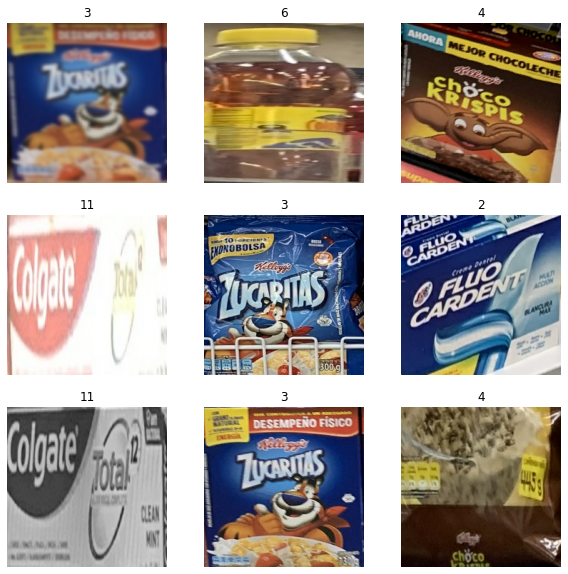

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")


In [19]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
inception = InceptionV3(include_top=False,weights='imagenet',input_shape=(img_height,img_width,3))

inception.trainable = False
inputs = tf.keras.Input(shape=(img_height,img_width,3))
x = inception(inputs,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes,activation='softmax')(x)
model = tf.keras.Model(inputs,outputs)

# x = resnet.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024,activation='relu')(x)
# preds = Dense(num_classes,activation='softmax')(x)
# model = Model(inputs=resnet.input,outputs=preds)

#for layer in resnet.layers:
#  layer.trainable = False
#'sparse_categorical_crossentropy'
#tf.keras.losses.CosineSimilarity(axis=-1)
model.compile(optimizer='adam',loss=tf.keras.losses.CosineSimilarity(axis=-1),metrics=['accuracy'])
model.summary()


87924736/87910968 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 12)                24588     
                                                                 
Total params: 21,827,372
Trainable params: 24,588
Non-trainable params: 21,802,784
_________________________________________________________________


In [20]:
%%time
epochs = 10
history = model.fit(train_ds,epochs=epochs,validation_data=val_ds)

Epoch 1/10
128/128 [==============================] - 665s 5s/step - loss: -0.0743 - accuracy: 0.0739 - val_loss: -0.0738 - val_accuracy: 0.0738
Epoch 2/10
128/128 [==============================] - 560s 4s/step - loss: -0.0737 - accuracy: 0.0737 - val_loss: -0.0738 - val_accuracy: 0.0738
Epoch 3/10
128/128 [==============================] - 561s 4s/step - loss: -0.0737 - accuracy: 0.0737 - val_loss: -0.0738 - val_accuracy: 0.0738
Epoch 4/10
128/128 [==============================] - 558s 4s/step - loss: -0.0737 - accuracy: 0.0737 - val_loss: -0.0738 - val_accuracy: 0.0738
Epoch 5/10
128/128 [==============================] - 561s 4s/step - loss: -0.0764 - accuracy: 0.0764 - val_loss: -0.0900 - val_accuracy: 0.0900
Epoch 6/10
128/128 [==============================] - 559s 4s/step - loss: -0.0899 - accuracy: 0.0899 - val_loss: -0.0900 - val_accuracy: 0.0900
Epoch 7/10
128/128 [==============================] - 559s 4s/step - loss: -0.0899 - accuracy: 0.0899 - val_loss: -0.0900 - val_ac

In [ ]:
model.save('content/inception_retail_augmented_cosine.h5')

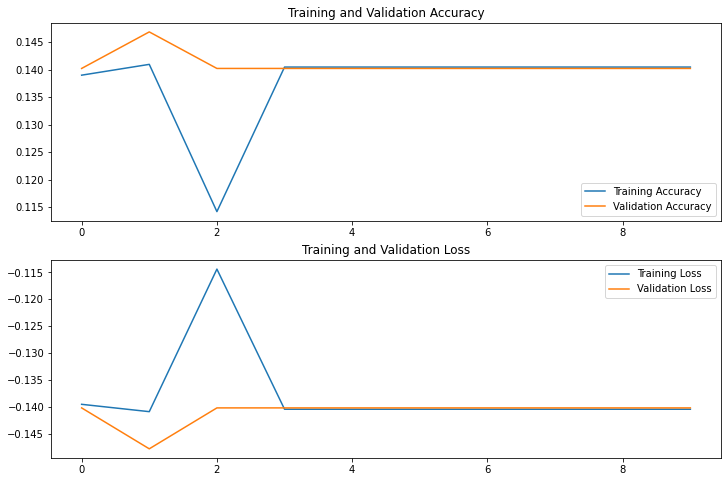

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Tesis/imageClassificationWeights/augmentedData/Inception/inception_retail_augmented.h5')

In [ ]:
test_loss,test_acc = model.evaluate(test_ds,verbose=2)
print("Test accuracy:",test_acc)

43/43 - 128s - loss: 3.8316 - accuracy: 0.6067 - 128s/epoch - 3s/step
Test accuracy: 0.6067251563072205


In [ ]:
cwd = os.getcwd()
dir = os.path.join(cwd,"images")
preds = []
labels = []
for sub_dir in os.listdir(test_dir):
  for img_name in os.listdir(os.path.join(test_dir,sub_dir)):
    img_dir = os.path.join(test_dir,sub_dir,img_name)
    #print(img_dir)
    img = tf.keras.utils.load_img(img_dir, target_size=(img_height, img_width))
    img = tf.keras.utils.img_to_array(img)
    img = tf.expand_dims(img, 0)
    #img = preprocess_input(img)
    pred = model.predict(img)
    labels.append(int(sub_dir)-2)
    pred = list(pred[0])
    preds.append(int(test_ds.class_names[np.argmax(pred)])-2)
    
    assert 0 <= preds[-1] <= num_classes-1
    

    
    #print(pred)
    #break
  #break

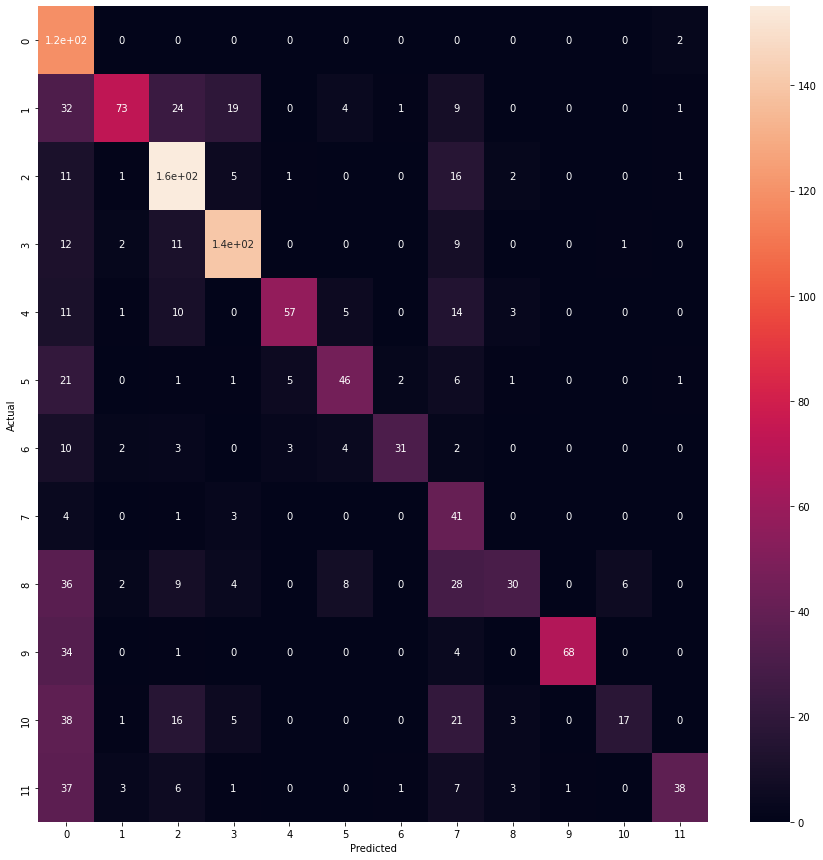

In [ ]:
from sklearn.metrics import confusion_matrix

assert len(labels) == len(preds)
conf_matrix = confusion_matrix(labels,preds)#tf.math.confusion_matrix(labels=labels, predictions=preds, num_classes=num_classes)
#conf_matrix
plt.figure(figsize=(15, 15))
conf_matrix = pd.crosstab(np.array(labels), np.array(preds), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

plt.show()

In [ ]:
#https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.5f}\n'.format(accuracy_score(labels, preds)))

print('Micro Precision: {:.5f}'.format(precision_score(labels, preds, average='micro')))
print('Micro Recall: {:.5f}'.format(recall_score(labels, preds, average='micro')))
print('Micro F1-score: {:.5f}\n'.format(f1_score(labels, preds, average='micro')))

print('Macro Precision: {:.5f}'.format(precision_score(labels, preds, average='macro')))
print('Macro Recall: {:.5f}'.format(recall_score(labels, preds, average='macro')))
print('Macro F1-score: {:.5f}\n'.format(f1_score(labels, preds, average='macro')))

print('Weighted Precision: {:.5f}'.format(precision_score(labels, preds, average='weighted')))
print('Weighted Recall: {:.5f}'.format(recall_score(labels, preds, average='weighted')))
print('Weighted F1-score: {:.5f}'.format(f1_score(labels, preds, average='weighted')))


Accuracy: 0.59576

Micro Precision: 0.59576
Micro Recall: 0.59576
Micro F1-score: 0.59576

Macro Precision: 0.71786
Macro Recall: 0.58254
Macro F1-score: 0.57703

Weighted Precision: 0.73072
Weighted Recall: 0.59576
Weighted F1-score: 0.59782


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(labels, preds, target_names=['Class {0}'.format(i+1) for i in range(num_classes)])
print(report)

              precision    recall  f1-score   support

     Class 1       0.33      0.98      0.49       121
     Class 2       0.86      0.45      0.59       163
     Class 3       0.65      0.81      0.72       192
     Class 4       0.79      0.80      0.79       175
     Class 5       0.86      0.56      0.68       101
     Class 6       0.69      0.55      0.61        84
     Class 7       0.89      0.56      0.69        55
     Class 8       0.26      0.84      0.40        49
     Class 9       0.71      0.24      0.36       123
    Class 10       0.99      0.64      0.77       107
    Class 11       0.71      0.17      0.27       101
    Class 12       0.88      0.39      0.54        97

    accuracy                           0.60      1368
   macro avg       0.72      0.58      0.58      1368
weighted avg       0.73      0.60      0.60      1368



# Xception

In [21]:
img_height,img_width = 150,150
batch_size = 32

In [22]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  label_mode = 'categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)#porque batch size?


Found 4072 files belonging to 12 classes.


In [23]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  label_mode = 'categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)#porque batch size?

Found 1355 files belonging to 12 classes.


In [24]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  label_mode = 'categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)#porque batch size?

Found 1368 files belonging to 12 classes.


In [ ]:
train_ds.class_names

['10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9']

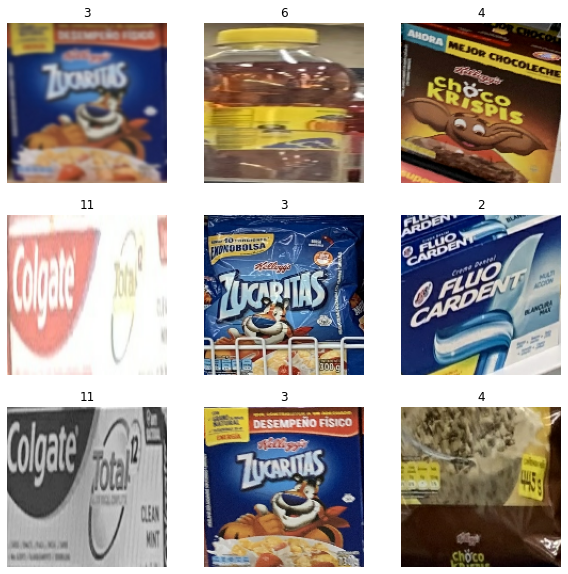

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")


In [27]:
from tensorflow.keras.applications.xception import Xception
xception = Xception(include_top=False,weights='imagenet',input_shape=(img_height,img_width,3))

xception.trainable = False
inputs = tf.keras.Input(shape=(img_height,img_width,3))
x = xception(inputs,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes,activation='softmax')(x)
model = tf.keras.Model(inputs,outputs)

# x = resnet.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024,activation='relu')(x)
# preds = Dense(num_classes,activation='softmax')(x)
# model = Model(inputs=resnet.input,outputs=preds)

#for layer in resnet.layers:
#  layer.trainable = False

model.compile(optimizer='adam',loss=tf.keras.losses.CosineSimilarity(axis=-1),metrics=['accuracy'])
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 12)                24588     
                                                                 
Total params: 20,886,068
Trainable params: 24,588
Non-trainable params: 20,861,480
_________________________________________________________________


In [28]:
%%time
epochs = 10
history = model.fit(train_ds,epochs=epochs,validation_data=val_ds)

Epoch 1/10
128/128 [==============================] - 445s 3s/step - loss: -0.1244 - accuracy: 0.1235 - val_loss: -0.1284 - val_accuracy: 0.1284
Epoch 2/10
128/128 [==============================] - 420s 3s/step - loss: -0.1290 - accuracy: 0.1289 - val_loss: -0.1462 - val_accuracy: 0.1446
Epoch 3/10
128/128 [==============================] - 424s 3s/step - loss: -0.1328 - accuracy: 0.1324 - val_loss: -0.1284 - val_accuracy: 0.1284
Epoch 4/10
128/128 [==============================] - 423s 3s/step - loss: -0.1291 - accuracy: 0.1289 - val_loss: -0.1284 - val_accuracy: 0.1284
Epoch 5/10
128/128 [==============================] - 418s 3s/step - loss: -0.1292 - accuracy: 0.1292 - val_loss: -0.1284 - val_accuracy: 0.1284
Epoch 6/10
128/128 [==============================] - 426s 3s/step - loss: -0.1299 - accuracy: 0.1299 - val_loss: -0.1284 - val_accuracy: 0.1284
Epoch 7/10
128/128 [==============================] - 420s 3s/step - loss: -0.1299 - accuracy: 0.1299 - val_loss: -0.1284 - val_ac

In [ ]:
model.save('content/xception_retail_augmented_cosine.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


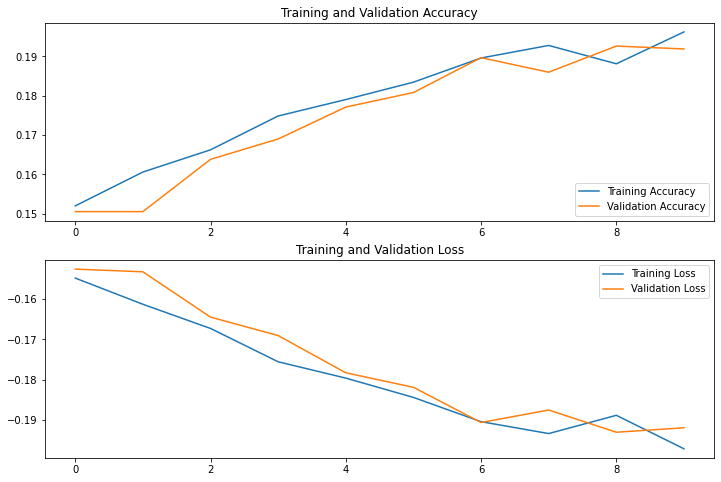

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Tesis/imageClassificationWeights/augmentedData/Xception/xception_retail_augmented.h5')

In [ ]:
test_loss,test_acc = model.evaluate(test_ds,verbose=2)
print("Test accuracy:",test_acc)

43/43 - 95s - loss: 1.3784 - accuracy: 0.7749 - 95s/epoch - 2s/step
Test accuracy: 0.7748538255691528


In [ ]:
#model = tf.keras.models.load_model("/content/drive/MyDrive/Tesis/imageClassificationWeights/Resnet/resnet_retail.h5")
# preds = list(model.predict(test_ds))
# preds = [list(preds[i]).index(max(preds[i])) for i in range(len(preds))]
# preds
cwd = os.getcwd()
dir = os.path.join(cwd,"images")
preds = []
labels = []
for sub_dir in os.listdir(test_dir):
  for img_name in os.listdir(os.path.join(test_dir,sub_dir)):
    img_dir = os.path.join(test_dir,sub_dir,img_name)
    #print(img_dir)
    img = tf.keras.utils.load_img(img_dir, target_size=(img_height, img_width))
    img = tf.keras.utils.img_to_array(img)
    img = tf.expand_dims(img, 0)
    #img = preprocess_input(img)
    pred = model.predict(img)
    labels.append(int(sub_dir)-2)
    pred = list(pred[0])
    preds.append(int(test_ds.class_names[np.argmax(pred)])-2)
    
    assert 0 <= preds[-1] <= num_classes-1
    

    
    #print(pred)
    #break
  #break

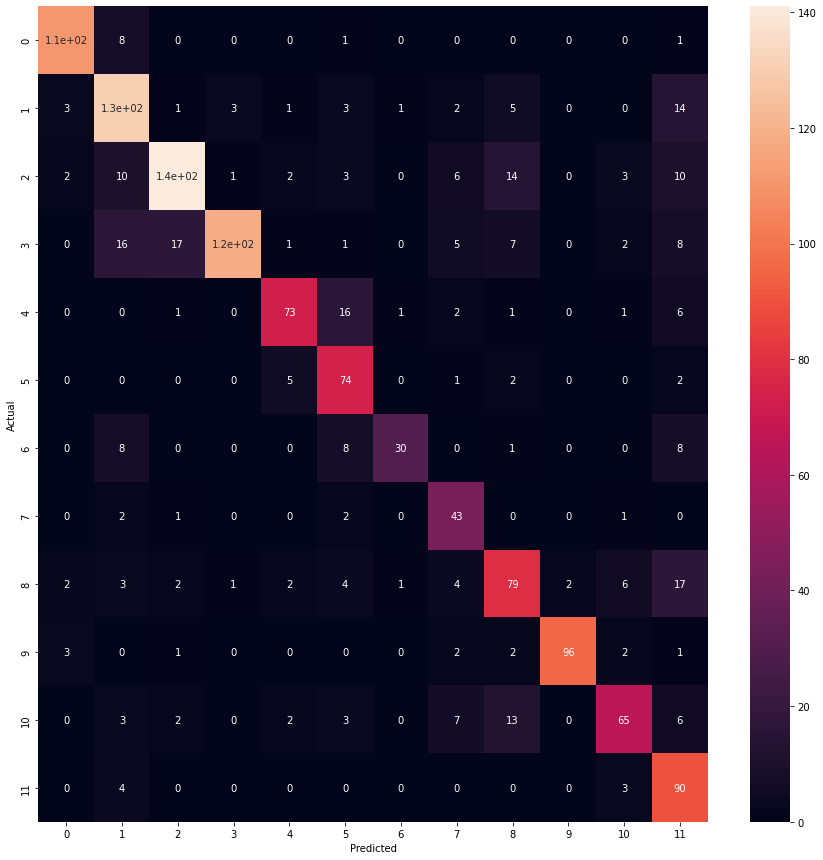

In [ ]:
from sklearn.metrics import confusion_matrix

assert len(labels) == len(preds)
conf_matrix = confusion_matrix(labels,preds)#tf.math.confusion_matrix(labels=labels, predictions=preds, num_classes=num_classes)
#conf_matrix
plt.figure(figsize=(15, 15))
conf_matrix = pd.crosstab(np.array(labels), np.array(preds), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

plt.show()

In [ ]:
#https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.5f}\n'.format(accuracy_score(labels, preds)))

print('Micro Precision: {:.5f}'.format(precision_score(labels, preds, average='micro')))
print('Micro Recall: {:.5f}'.format(recall_score(labels, preds, average='micro')))
print('Micro F1-score: {:.5f}\n'.format(f1_score(labels, preds, average='micro')))

print('Macro Precision: {:.5f}'.format(precision_score(labels, preds, average='macro')))
print('Macro Recall: {:.5f}'.format(recall_score(labels, preds, average='macro')))
print('Macro F1-score: {:.5f}\n'.format(f1_score(labels, preds, average='macro')))

print('Weighted Precision: {:.5f}'.format(precision_score(labels, preds, average='weighted')))
print('Weighted Recall: {:.5f}'.format(recall_score(labels, preds, average='weighted')))
print('Weighted F1-score: {:.5f}'.format(f1_score(labels, preds, average='weighted')))


Accuracy: 0.76754

Micro Precision: 0.76754
Micro Recall: 0.76754
Micro F1-score: 0.76754

Macro Precision: 0.78194
Macro Recall: 0.77176
Macro F1-score: 0.76153

Weighted Precision: 0.79826
Weighted Recall: 0.76754
Weighted F1-score: 0.77049


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(labels, preds, target_names=['Class {0}'.format(i+1) for i in range(num_classes)])
print(report)

              precision    recall  f1-score   support

     Class 1       0.92      0.92      0.92       121
     Class 2       0.71      0.80      0.75       163
     Class 3       0.85      0.73      0.79       192
     Class 4       0.96      0.67      0.79       175
     Class 5       0.85      0.72      0.78       101
     Class 6       0.64      0.88      0.74        84
     Class 7       0.91      0.55      0.68        55
     Class 8       0.60      0.88      0.71        49
     Class 9       0.64      0.64      0.64       123
    Class 10       0.98      0.90      0.94       107
    Class 11       0.78      0.64      0.71       101
    Class 12       0.55      0.93      0.69        97

    accuracy                           0.77      1368
   macro avg       0.78      0.77      0.76      1368
weighted avg       0.80      0.77      0.77      1368

